In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')


!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv
clear_output()

In [0]:
energy_data = pd.read_csv("energydata_complete.csv")
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [0]:
energy_data = energy_data.drop(columns=['date','rv1', 'rv2'])
energy_data = energy_data.round(3)

print(energy_data.isnull().any())
print(energy_data.isnull().sum())

In [0]:
energy_data.describe()

In [0]:
energy_data.filter(['Appliances'], axis=1).describe()

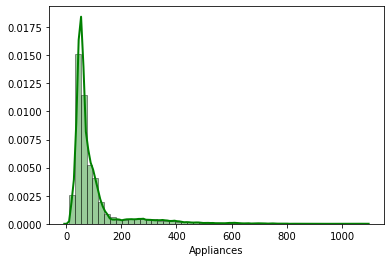

In [0]:
sb.distplot(energy_data['Appliances'], hist=True, kde=True, 
             bins= 50, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [0]:
energy_data['Appliances'] = np.where(energy_data['Appliances']<= 100,0,1)
energy_data

In [0]:
energy_data.filter(['Appliances'], axis=1).describe()

In [0]:
Y = energy_data.iloc[:,0]
X = energy_data.iloc[:,1:26]

random.seed(144)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

k_fold = KFold(n_splits=10, shuffle=False, random_state=0)

In [0]:
DTC = DecisionTreeClassifier(criterion='gini', max_depth=2)
DTC.fit(X_train, Y_train)
DT_pred = DTC.predict(X_test)


CV_score_dtree = (cross_val_score(DTC, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
Accuracy_Score_dtree = accuracy_score(Y_test, DT_pred)

print(confusion_matrix(Y_test, DT_pred))
print(classification_report(Y_test,DT_pred))
print("Accuracy Score: ", round(Accuracy_Score_dtree,3)*100)
print("Cross-Validation Score: ", round(CV_score_dtree,3)*100)

[[2956  107]
 [ 783  101]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      3063
           1       0.49      0.11      0.18       884

    accuracy                           0.77      3947
   macro avg       0.64      0.54      0.53      3947
weighted avg       0.72      0.77      0.72      3947

Accuracy Score:  77.5
Cross-Validation Score:  78.7


In [0]:
ABC = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=200
)

ABC.fit(X_train, Y_train)
AB_pred = ABC.predict(X_test)

Accuracy_Score_AdaBoost = accuracy_score(Y_test, AB_pred)

print(confusion_matrix(Y_test, AB_pred))
print(classification_report(Y_test,AB_pred))
print("Accuracy Score: ", round(Accuracy_Score_AdaBoost,3)*100)

CV_Score_AdaBoost = cross_val_score(ABC, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()
print("Cross-Validation Score: ", round(CV_Score_AdaBoost,3)*100)

[[2866  197]
 [ 286  598]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3063
           1       0.75      0.68      0.71       884

    accuracy                           0.88      3947
   macro avg       0.83      0.81      0.82      3947
weighted avg       0.87      0.88      0.88      3947

Accuracy Score:  87.8
Cross-Validation Score:  89.0
